# Research and Data Understanding

Despite the fact that EDA is not the main focus, a basic understanding of the data is beneficial. Steps that will be proceeded:

1. **_Data Distribution_**. Checking the distribution of `complaints` across different product categories. This will help to understand if the dataset is imbalanced. 
2. **_Text Analysis_**. Quick look at the `narratives` to understand their length, complexity and any common patterns. 
3. **_Data Cleaning and Preprocessing_**. Through the narratives seems to be preprocessed (lowercase, lemmatization) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import plotly
import warnings

warnings.filterwarnings("ignore")

In [2]:
data_path = "../data/raw/complaints_processed.csv"
complaints_data = pd.read_csv(data_path, index_col = 0)
complaints_data.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [3]:
# Check for missing or null values in the narrative column
complaints_data['narrative'].isnull().sum()

10

In [3]:
# Handling non-string values - filling missing values with empty strings and converting to string
complaints_data['narrative'] = complaints_data['narrative'].fillna('').astype(str)

In [5]:
# Calculating the length of each narrative
complaints_data['narrative_length'] = complaints_data['narrative'].apply(len)
complaints_data['narrative_length'].describe()

count    162421.000000
mean        588.499603
std         830.964663
min           0.000000
25%         192.000000
50%         361.000000
75%         683.000000
max       20596.000000
Name: narrative_length, dtype: float64

In [24]:
complaints_data['product'].value_counts()

product
credit_reporting       91179
debt_collection        23150
mortgages_and_loans    18990
credit_card            15566
retail_banking         13536
Name: count, dtype: int64

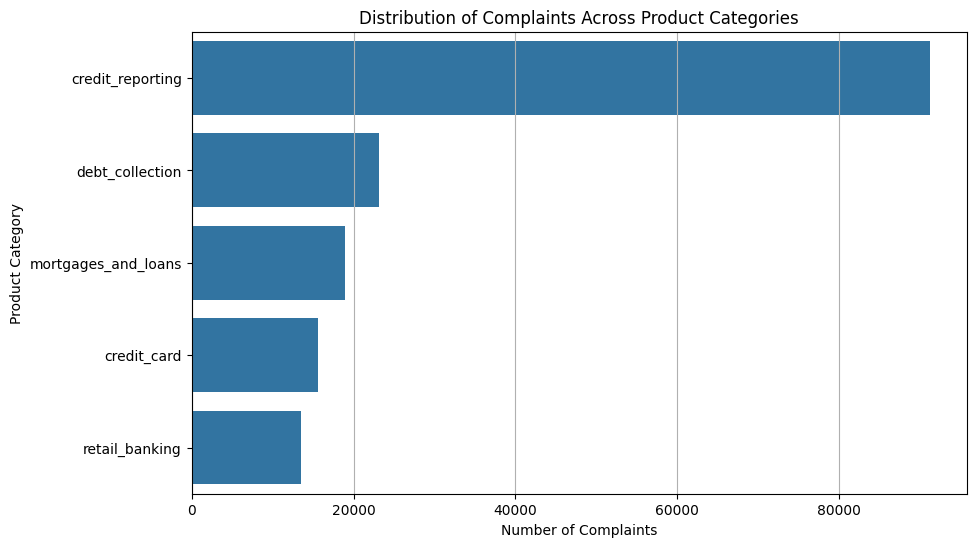

In [25]:
# Visualization of Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=complaints_data, y='product', order=complaints_data['product'].value_counts().index)
plt.title('Distribution of Complaints Across Product Categories')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.grid(axis='x')
plt.show()

_Distribution of Complaints Across Product Categories:_

* bar chart shows the number of complaints for each product category.
* this helps us understand which categories have the most complaints, indicating potential areas of focus for the classification model.
* some categories have significantly more complaints than others, indicating an imbalance in the dataset.

**Implication on the ML step (modelling):**

* **Handling Class Imbalance:** Since some categories have many more complaints than others, our model might be biased towards predicting these categories more often. We need to consider techniques to handle this imbalance, such as oversampling the minority classes, undersampling the majority classes, or using class weights in our model training.
* **Model Evaluation:** Given the class imbalance, accuracy alone might not be a sufficient metric for evaluating our model. We should also consider metrics like precision, recall, and F1-score for a more comprehensive evaluation.

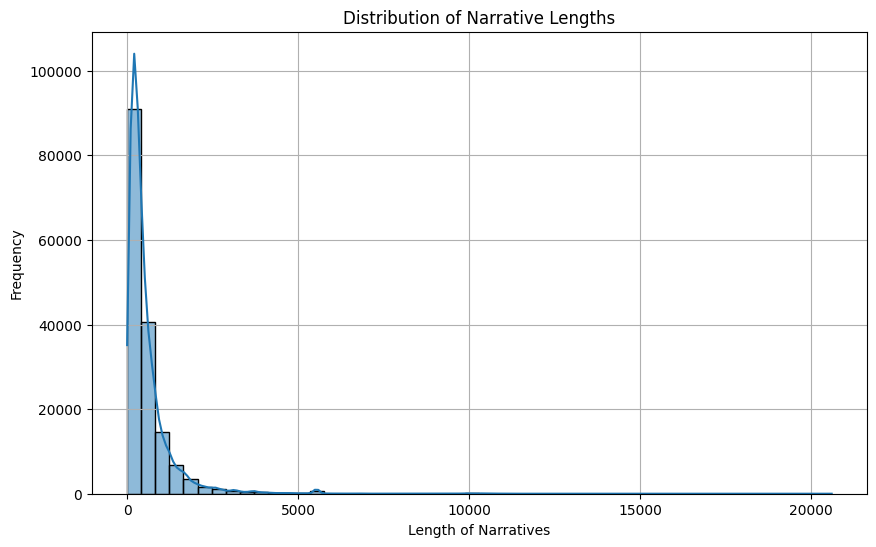

In [26]:
# Visualization of Narrative Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(complaints_data['narrative_length'], bins=50, kde=True)
plt.title('Distribution of Narrative Lengths')
plt.xlabel('Length of Narratives')
plt.ylabel('Frequency')
plt.grid()
plt.show()

_Distribution of Narrative Lengths:_

* histogram displays the frequency distribution of the lengths of the complaint narratives.
* histogram shows a wide range of narrative lengths, with most narratives being relatively short but some being quite long.

**Implication on the ML step (modelling):**

* **Preprocessing Text Data:** The variability in narrative lengths suggests the need for careful text preprocessing. For instance, we might need to truncate or pad the narratives to make them a uniform length for certain types of models.
* **Model Selection:** The model we choose should be capable of handling this variability in input lengths. Models like LSTM (Long Short-Term Memory) or Transformers, which are good at handling variable-length input, might be appropriate

In [ ]:
from collections import Counter
import nltk
import string
from nltk.corpus import stopwords

nltk.download('stopwords')

In [28]:
def word_freq_analysis(data, category_col, text_col, num_words=10):
    """Performs word frequency analysis in a memory-efficient way."""
    categories = data[category_col].unique()
    category_word_counts = {}

    for category in categories:
        word_freq = Counter()
        category_data = data[data[category_col] == category][text_col]

        for text in category_data:
            words = text.lower().translate(str.maketrans('', '', string.punctuation)).split()
            filtered_words = [word for word in words if word not in stopwords.words('english')]
            word_freq.update(filtered_words)

        category_word_counts[category] = word_freq.most_common(num_words)

    return category_word_counts

In [29]:
# Most common words in the entire dataset
common_words_overall = word_freq_analysis(complaints_data, 'product', 'narrative')

In [30]:
# Narrative Length by Category Analysis (by class)
narrative_length_by_category = complaints_data.groupby('product')['narrative_length'].agg(['mean', 'std', 'min', 'max'])

common_words_overall, narrative_length_by_category

({'credit_card': [('card', 37861),
   ('credit', 33268),
   ('account', 28506),
   ('payment', 17876),
   ('bank', 14078),
   ('charge', 13869),
   ('would', 13002),
   ('time', 12595),
   ('one', 11316),
   ('received', 10273)],
  'retail_banking': [('account', 45472),
   ('bank', 26096),
   ('money', 15977),
   ('would', 10500),
   ('day', 9942),
   ('told', 9681),
   ('check', 9313),
   ('fund', 9162),
   ('time', 8675),
   ('transaction', 8135)],
  'credit_reporting': [('credit', 224547),
   ('account', 188590),
   ('report', 144587),
   ('information', 107572),
   ('reporting', 80306),
   ('consumer', 50212),
   ('payment', 45660),
   ('dispute', 42434),
   ('letter', 39075),
   ('day', 39048)],
  'mortgages_and_loans': [('payment', 47361),
   ('loan', 44211),
   ('mortgage', 26602),
   ('would', 22593),
   ('account', 19100),
   ('time', 18356),
   ('credit', 15874),
   ('told', 15638),
   ('company', 14550),
   ('received', 14327)],
  'debt_collection': [('debt', 42663),
   ('cr

Although the study of word frequency for each class shows the influence of a certain word as a factor in class understanding, but it cannot be considered as a sufficient basis for constructing a heuristic rule that could give a good classification quality. Beside that fact in research of the common words in each category, also there is no important differences in the text length by each category.

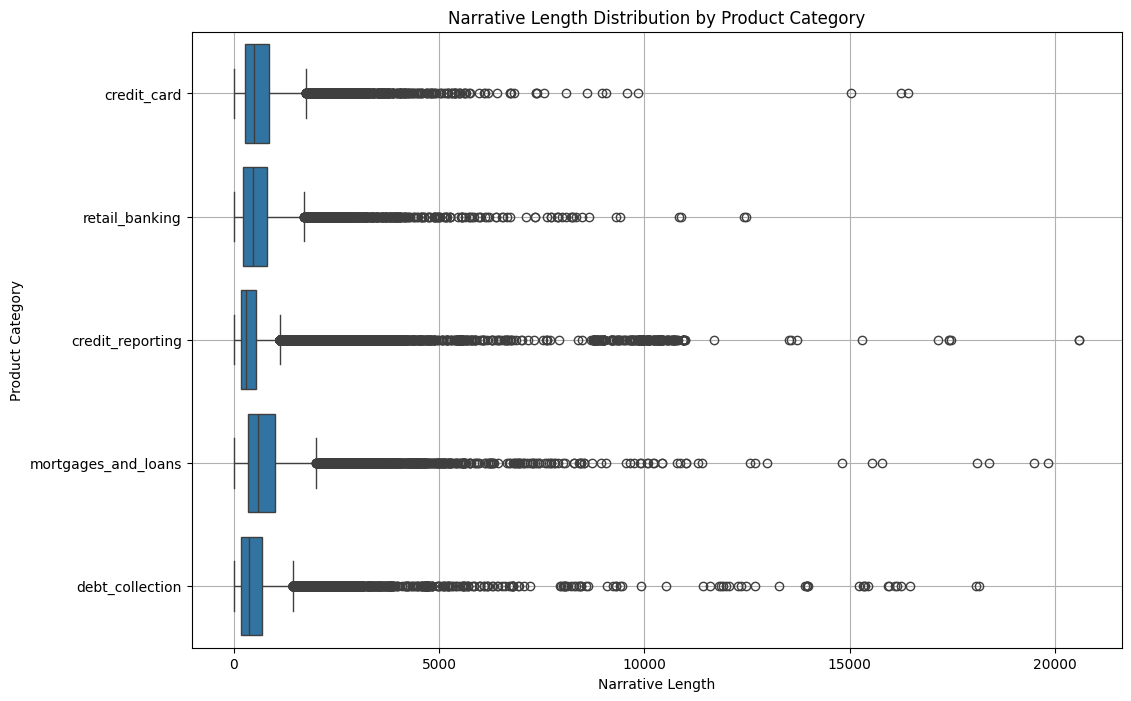

({'mortgages_and_loans': [('payment', 4525),
   ('loan', 4274),
   ('mortgage', 2549),
   ('would', 2149),
   ('time', 1751),
   ('account', 1730),
   ('credit', 1531),
   ('told', 1493),
   ('company', 1442),
   ('received', 1376)],
  'credit_reporting': [('credit', 22011),
   ('account', 18706),
   ('report', 14446),
   ('information', 10664),
   ('reporting', 8080),
   ('consumer', 5242),
   ('payment', 4389),
   ('dispute', 4279),
   ('day', 3914),
   ('letter', 3908)],
  'debt_collection': [('debt', 4089),
   ('credit', 3724),
   ('account', 3606),
   ('collection', 2117),
   ('report', 1985),
   ('company', 1691),
   ('information', 1597),
   ('letter', 1344),
   ('payment', 1189),
   ('received', 1158)],
  'retail_banking': [('account', 4506),
   ('bank', 2735),
   ('money', 1602),
   ('would', 1047),
   ('day', 1024),
   ('told', 983),
   ('check', 897),
   ('time', 887),
   ('fund', 868),
   ('back', 808)],
  'credit_card': [('card', 3994),
   ('credit', 3586),
   ('account', 

In [31]:
# Simplified EDA using Sampling

# Creating a random sample of the dataset (e.g., 10% of the data)
sampled_data = complaints_data.sample(frac=0.1, random_state=42)

# Performing word frequency analysis on the sampled data
sampled_word_counts = word_freq_analysis(sampled_data, 'product', 'narrative')

# Visualizing Narrative Length Distribution by Category
plt.figure(figsize=(12, 8))
sns.boxplot(data=complaints_data, x='narrative_length', y='product')
plt.title('Narrative Length Distribution by Product Category')
plt.xlabel('Narrative Length')
plt.ylabel('Product Category')
plt.grid()
plt.show()

sampled_word_counts, narrative_length_by_category

### Let's research a sentiment of each class in order to get some useful insights

I won't use any complex ML models here. I have easy and fast `textblob` class that have _rule based sentiment analysis feature_ and will give a chance to it in order to get the intuition of the sentiment distribution in the dataset. 

To install textblob: `pip install textblob`

In [35]:
from textblob import TextBlob

def calculate_sentiment(text):
    sentiment_analyzer = TextBlob(text)
    return sentiment_analyzer.polarity, sentiment_analyzer.subjectivity

In [36]:
complaints_data["sentiment_polarity"], complaints_data["sentiment_subjectivity"] = zip(*complaints_data['narrative'].map(calculate_sentiment))

In [37]:
# Analyzing sentiment by product category
sentiment_by_category = complaints_data.groupby('product')[['sentiment_polarity', 'sentiment_subjectivity']].mean()

sentiment_by_category

,sentiment_polarity,sentiment_subjectivity
product,,
credit_card,0.011925,0.377279
credit_reporting,0.010682,0.355598
debt_collection,0.029628,0.346339
mortgages_and_loans,0.010069,0.375733
retail_banking,0.013941,0.334643


### Model Experimentation Phase (Classical Models):

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm import tqdm_notebook, tqdm

In [7]:
X, y = complaints_data['narrative'].fillna(''), complaints_data["product"]

# Ecnoding the categorical labels into numerical values
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(y)

In [8]:
models = [
    ('MultinomialNB', MultinomialNB()),
    ('LogisticRegression', LogisticRegression(max_iter=300)),
    ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()),
]

In [9]:
# Model Experiment Class:
class ModelExperiment:
    def __init__(self, X, y, models):
        self.X = X
        self.y = y
        self.models = models
    
    def train_evaluate(self):
        X_train, X_test, y_train, y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)
        
        # TF-IDF Vectorization
        vectorizer = TfidfVectorizer()
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
        
        
        for model_name, model in tqdm(self.models, desc="Training Models"):
            print(f"\nTraining and evaluating model: {model_name}")
            model.fit(X_train_tfidf, y_train)
            predictions = model.predict(X_test_tfidf)
            print(classification_report(y_test, predictions, target_names=label_encoder.classes_))


In [10]:
experiment = ModelExperiment(X, y_encoded, models)

In [ ]:
experiment.train_evaluate()

Training Models:   0%|          | 0/5 [00:00<?, ?it/s]


Training and evaluating model: MultinomialNB
                     precision    recall  f1-score   support

        credit_card       0.80      0.60      0.69      3212
   credit_reporting       0.80      0.96      0.87     18130
    debt_collection       0.85      0.44      0.58      4619
mortgages_and_loans       0.80      0.79      0.79      3738
     retail_banking       0.91      0.71      0.80      2786

           accuracy                           0.81     32485
          macro avg       0.83      0.70      0.74     32485
       weighted avg       0.81      0.81      0.80     32485


Training and evaluating model: LogisticRegression


Training Models:  40%|████      | 2/5 [00:27<00:41, 13.81s/it]

                     precision    recall  f1-score   support

        credit_card       0.80      0.79      0.79      3212
   credit_reporting       0.90      0.93      0.92     18130
    debt_collection       0.80      0.72      0.76      4619
mortgages_and_loans       0.85      0.82      0.84      3738
     retail_banking       0.87      0.87      0.87      2786

           accuracy                           0.87     32485
          macro avg       0.84      0.83      0.83     32485
       weighted avg       0.87      0.87      0.87     32485


Training and evaluating model: DecisionTreeClassifier


Training Models:  60%|██████    | 3/5 [04:51<03:55, 117.97s/it]

                     precision    recall  f1-score   support

        credit_card       0.68      0.64      0.66      3212
   credit_reporting       0.89      0.92      0.90     18130
    debt_collection       0.71      0.69      0.70      4619
mortgages_and_loans       0.76      0.71      0.74      3738
     retail_banking       0.75      0.72      0.73      2786

           accuracy                           0.82     32485
          macro avg       0.76      0.74      0.75     32485
       weighted avg       0.82      0.82      0.82     32485


Training and evaluating model: RandomForestClassifier


Training Models:  80%|████████  | 4/5 [24:55<08:43, 523.13s/it]

                     precision    recall  f1-score   support

        credit_card       0.83      0.69      0.75      3212
   credit_reporting       0.88      0.97      0.92     18130
    debt_collection       0.90      0.69      0.78      4619
mortgages_and_loans       0.86      0.79      0.82      3738
     retail_banking       0.86      0.83      0.85      2786

           accuracy                           0.87     32485
          macro avg       0.86      0.79      0.82     32485
       weighted avg       0.87      0.87      0.87     32485


Training and evaluating model: KNeighborsClassifier


### Results:

**Multinomial Naive Bayes**

* _Strengths:_ Performs well with a decent balance between precision and recall across most categories.
* _Weaknesses:_ Lower recall in certain categories like 'debt_collection', indicating it's missing a significant number of relevant instances in these categories.
* _Suitability:_ This model is a good choice if we need a balance between precision and recall, and if computational efficiency is a concern, as it's generally faster than more complex models.


**Logistic Regression**

* _Strengths:_  Shows a high level of precision and recall across all categories, indicating it's accurately identifying relevant instances and not misclassifying many instances.
* _Weaknesses:_ Computationally more intensive than Multinomial Naive Bayes.
* _Suitability:_ Excellent for scenarios where both precision and recall are important. Best choice if the computational cost is not a major concern.

**Decision Tree Classifier**

* _Strengths:_ Decent performance with relatively balanced precision and recall.
* _Weaknesses:_ Lower precision and recall compared to Logistic Regression and RandomForest. It may also be prone to overfitting.
* _Suitability:_  Good for understanding the decision-making process (interpretability) but might not be the best choice for maximizing predictive performance.

**Random Forest Classifier**

* _Strengths:_ High precision and recall, similar to Logistic Regression, indicating robust performance across different categories.
* _Weaknesses:_ More computationally intensive, can be slower to train due to the ensemble nature of the model.
* _Suitability:_ Excellent choice for scenarios requiring high accuracy, and when the model interpretability is less of a concern. But due to needs of feature engineering it is a less favourable model for experimentation part (together with Decision Tree Classifier). 

If the priority is to maximize precision and recall and computational resources are not a limiting factor, `Logistic Regression` is the best choice.

### Experiments with Transformers

2 main strategies:

1. Using a Pretrained Transformer Model to fine-tune (like BERT or DistillBERT) on our own dataset for the classification task. 
2. Using Zero-Shot Learning, e.g. using a model capable of zero-shot learning (like `facebook/bart-large-mnli`) to classify text without any task-specific training. 

### Experiment 1: Using a Pretrained Transformer to fine-tune it on our own dataset: 

In [49]:
import torch
from utils.complaints_dataset import ComplaintsDataset
from torch.utils.data import DataLoader, Dataset, RandomSampler, SequentialSampler
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import logging
from tqdm.auto import tqdm

class TransformerClassifier:
    def __init__(self, model_name, labels=None, max_length=512, batch_size=128, learning_rate=0.1, epochs=1):
        self.model_name = model_name
        self.max_length = max_length
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        if labels is not None:
            self.label_encoder = LabelEncoder()
            self.label_encoder.fit(labels)
        else:
            self.label_encoder = None
                
        self.setup_logging()
        # Only download the model initially. Loading and training will be separate.
        self.download_model()
    
    def set_training_data(self, texts, labels):
        """
        Set the texts and labels for training and preprocess labels.
        """
        self.texts = texts
        self.labels = labels
        self.label_encoder = LabelEncoder()
        self.encoded_labels = self.label_encoder.fit_transform(self.labels)
        self.num_labels = len(self.label_encoder.classes_)
        self.prepare_dataset()
    
    def setup_logging(self):
        logging.basicConfig(level = logging.INFO)
        self.logger = logging.getLogger(__name__)
    
    def preprocess_labels(self):
        self.encoded_labels = self.label_encoder.fit_transform(self.labels)
        self.num_labels = len(self.label_encoder.classes_)
    
    def prepare_dataset(self):
        tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        dataset = ComplaintsDataset(self.texts, self.encoded_labels, tokenizer, self.max_length)
        train_size = int(0.8 * len(dataset))
        test_size = len(dataset) - train_size
        train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
        
        self.train_data_loader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=self.batch_size, num_workers=12)
        self.test_data_loader = DataLoader(test_dataset, sampler=SequentialSampler(test_dataset), batch_size=self.batch_size, num_workers=12)
        
        self.logger.info("Dataset prepared.")
        
    def download_model(self):
        """
        Download the model. If num_labels is defined, use it to initialize the model.
        """
        if hasattr(self, 'num_labels'):
            self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name, num_labels=self.num_labels).to(self.device)
        else:
            self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name).to(self.device)
        self.logger.info("Model downloaded.")
    
    def train(self, loss_threshold=1.3):
        optimizer = AdamW(self.model.parameters(), lr=self.learning_rate)
        total_steps = len(self.train_data_loader) * self.epochs
        scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

        self.model.train()
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}/{self.epochs}")
            epoch_iterator = tqdm(self.train_data_loader, desc="Iteration", total=len(self.train_data_loader))
            
            for batch in self.train_data_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                loss.backward()

                optimizer.step()
                scheduler.step()
                optimizer.zero_grad()
                
                epoch_iterator.set_postfix({'loss': loss.item()})
                
                # Early stopping check
                if loss.item() < loss_threshold:
                    print(f"Early stopping triggered at loss {loss.item()}")
                    return 

            print(f"Epoch {epoch+1} training complete.")
    
    def evaluate(self):
        self.model.eval()
        predictions, true_labels = [], []

        with torch.no_grad():
            for batch in self.test_data_loader:
                input_ids = batch['input_ids'].to(self.device)
                attention_mask = batch['attention_mask'].to(self.device)
                labels = batch['labels'].to(self.device)

                outputs = self.model(input_ids, attention_mask=attention_mask)
                logits = outputs.logits
                predictions.extend(torch.argmax(logits, dim=1).tolist())
                true_labels.extend(labels.tolist())

        report = classification_report(true_labels, predictions, target_names=self.label_encoder.classes_)
        self.logger.info("Evaluation results:\n" + report)

    def save_model(self, path):
        if not os.path.exists(path):
            os.makedirs(path)
        self.model.save_pretrained(path)
        self.tokenizer.save_pretrained(path)
        self.logger.info(f"Model saved to {path}.")
    
    def load_model(self, model_path):
        self.model = AutoModelForSequenceClassification.from_pretrained(model_path)
        self.tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
        self.model.to(self.device)
        self.logger.info("Model loaded from {}".format(model_path))
    
    def predict(self, text):
        if not hasattr(self, 'tokenizer') or self.label_encoder is None:
            raise AttributeError("Tokenizer or label encoder not found. Make sure the model is loaded and labels are set.")
        
        if not hasattr(self, 'tokenizer'):
            raise AttributeError("Tokenizer not found. Ensure the model is loaded with load_model.")

        inputs = self.tokenizer.encode_plus(
            text, 
            add_special_tokens=True, 
            max_length=self.max_length, 
            return_token_type_ids=False, 
            padding="max_length", 
            return_attention_mask=True, 
            return_tensors="pt", 
            truncation=True
        )
        input_ids = inputs["input_ids"].to(self.device)
        attention_mask = inputs["attention_mask"].to(self.device)

        # Perform prediction
        with torch.no_grad():
            outputs = self.model(input_ids, attention_mask=attention_mask)
            logits = outputs.logits

        # Convert logits to class index
        predicted_class_idx = torch.argmax(logits, dim=1).cpu().numpy()[0]

        # Convert class index to label
        predicted_label = self.label_encoder.inverse_transform([predicted_class_idx])[0]
        return predicted_label

In [8]:
text = complaints_data["narrative"].fillna('')
labels = complaints_data["product"]

In [48]:
# Initialize the class with the model name and additional parameters
classifier = TransformerClassifier(model_name = "distilbert-base-uncased", labels = labels)

TypeError: TransformerClassifier.__init__() got an unexpected keyword argument 'labels'

In [10]:
# Dataset Preparation
classifier.prepare_dataset()

INFO:__main__:Dataset prepared.


In [ ]:
# Downloading the model 
classifier.download_model()

In [12]:
# Fine tune the model 
classifier.train()

Epoch 1/1


Iteration:   0%|          | 0/1016 [00:27<?, ?it/s]

Early stopping triggered at loss 1.2377147674560547


In [ ]:
# Evaluate the model
classifier.evaluate()

In [16]:
# saving the model
import os
classifier.save_model("./../checkpoints/distil_bert_uncased_finetuned")

INFO:__main__:Model saved to ./../checkpoints/distil_bert_uncased_finetuned/.


In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

labels = ["credit card", "retail banking", "mortgage", "loan", "complaint"]

classifier = TransformerClassifier(model_name = 'distilbert-base-uncased', labels = labels)
classifier.load_model("./../checkpoints/distil_bert_uncased_finetuned")

In [32]:
complaints_data

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...
...,...,...
162416,debt_collection,name
162417,credit_card,name
162418,debt_collection,name
162419,credit_card,name


In [51]:
sample_text = complaints_data['narrative'].iloc[0]
sample_label = complaints_data['product'].iloc[0]

In [53]:
predicted_label = classifier.predict(sample_text)
print("Predicted label:", predicted_label)
print("Actual label:", sample_label)

Predicted label: credit card
Actual label: credit_card


### Experiment 2: Using a Pretrained Transformer for Zero-Shot Learning: 

In [58]:
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import logging
import os


class ZeroShotClassifier:
    def __init__(self, model_name="facebook/bart-large-mnli", labels=None, batch_size=300):
        self.model_name = model_name
        self.labels = labels
        self.batch_size = batch_size
        self.classifier = pipeline("zero-shot-classification", model=model_name, device=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
        self.setup_logging()
        self.download_model()
    
    def setup_logging(self):
        logging.basicConfig(level=logging.INFO)
        self.logger = logging.getLogger(__name__)
        
    def download_model(self):
        self.model = AutoModelForSequenceClassification.from_pretrained(self.model_name)
        self.tokenizer = AutoTokenizer.from_pretrained(self.model_name)
        self.logger.info("Model and tokenizer downloaded.")


    def classify(self, dataset, text_column):
        self.logger.info("Starting classification process.")
        all_predictions = []

        # Process texts in batches
        for i in range(0, len(dataset), self.batch_size):
            batch_texts = dataset[text_column][i:i + self.batch_size].tolist()
            batch_results = self.classifier(batch_texts, candidate_labels=self.labels, truncation=True)
            
            # Extracting predicted labels from batch results
            batch_predictions = [result['labels'][0] for result in batch_results]
            all_predictions.extend(batch_predictions)

        # Add predictions to the dataset
        dataset['predicted_label'] = all_predictions
        return dataset
    
    def evaluate_inference_quality(self, dataset, true_label_column):
        self.logger.info("Evaluating inference quality.")
        report = classification_report(dataset[true_label_column], dataset['predicted_label'], labels=self.labels)
        print(report)
        return report

    def save_model(self, path):
        if not os.path.exists(path):
            os.makedirs(path)
        self.model.save_pretrained(path)
        self.tokenizer.save_pretrained(path)
        self.logger.info(f"Model saved to {path}.")

In [59]:
labels = ["credit card", "retail banking", "mortgage", "loan", "complaint"]
zero_shot_classifier = ZeroShotClassifier(labels=labels, batch_size = 512)

INFO:__main__:Model and tokenizer downloaded.


In [ ]:
classified_dataset = zero_shot_classifier.classify(complaints_data, 'narrative')
evaluation_report = zero_shot_classifier.evaluate_inference_quality(classified_dataset, 'product')

### Final thoughts:

1. **_Logistic Regression_** 

* _Ease of Use:_ Logistic Regression proved to be straightforward to implement and use. Its simplicity is a significant advantage, especially when dealing with less complex classification tasks or when rapid development is necessary.
* _Resource Efficiency:_ It is computationally less intensive compared to deep learning models, making it a good choice for environments with limited resources.
* _Performance_: While effective for many tasks, its performance might lag behind more complex models, especially in handling nuanced language features in large and complex datasets.


2. **_Fine-Tuning Transformer_**

* _Complexity_: Implementing and fine-tuning transformer models like BERT or DistilBERT is inherently more complex and resource intensive.
* _Resource Intensity_: These models are resource-intensive, requiring significant computation power (preferably GPUs) for both training and inference.
* _Performance_: Transformer models generally offer superior performance, especially in capturing contextual nuances in text. They are well-suited for complex NLP tasks.


3. **_Zero-Shot Classification with Transformers:_**:

* _Flexibility_: Zero-shot classification is highly flexible, allowing models to predict labels that were not seen during training. This is particularly beneficial for applications where the labels can vary or are not known in advance.
* _Resource and Time Instensive_: Similar to fine-tuning, zero-shot learning models are resource-heavy and can be slow, especially when processing large datasets.
* _Inference Complexity_: While offering a powerful approach to classification, the inference process can be slower and more complex compared to traditional machine learning models.